## Machine Predictive Maintenance
## Capstone Two - Step Four: Modeling

This project revolves around the crucial task of predicting machine failures, which is essentially a binary classification problem set within a time series framework. Four foundational machine learning algorithms will be applied, including Logistic Regression, Random Forest, Gradient Boosting Classifier and LSTM. Performance metrics will be used to evaluate each model, including accuracy, precision, recall, F1-score, and ROC AUC.

The raw dataset can be obtained through the following link:

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [2]:
# Load the training and testing sets from CSV files
X_train = pd.read_csv('SplittedData/X_train.csv', index_col=0)
X_test = pd.read_csv('SplittedData/X_test.csv', index_col=0)
y_train = pd.read_csv('SplittedData/y_train.csv', index_col=0).values.ravel()
y_test = pd.read_csv('SplittedData/y_test.csv', index_col=0).values.ravel()

In [3]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


### Logistic Regression model with default parameters

Logistic Regression Accuracy: 0.9805
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1961
           1       0.00      0.00      0.00        39

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.96      0.98      0.97      2000



C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


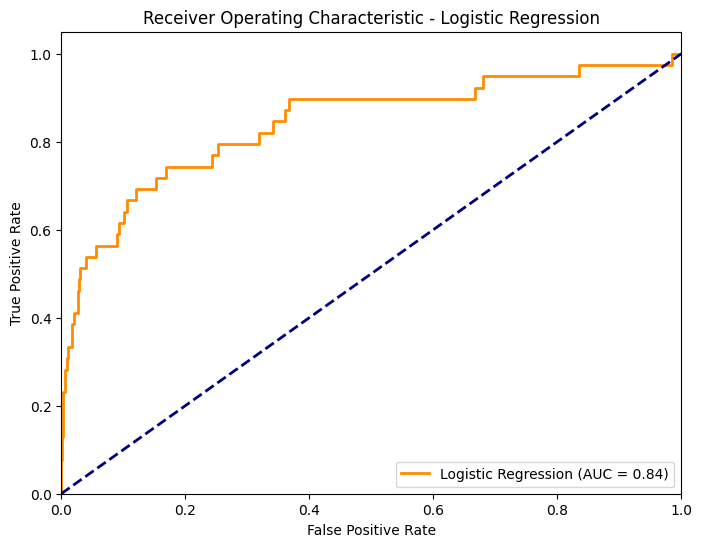

In [4]:
# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Compute ROC curve and ROC area for the Logistic Regression model
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Logistic Regression achieved high accuracy, but it struggles with class 1, having low precision, recall, and F1-score for that class. The ROC AUC score is decent but could be improved.

### Random Forest with default parameters

Random Forest Accuracy: 0.9805
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1961
           1       0.50      0.23      0.32        39

    accuracy                           0.98      2000
   macro avg       0.74      0.61      0.65      2000
weighted avg       0.98      0.98      0.98      2000



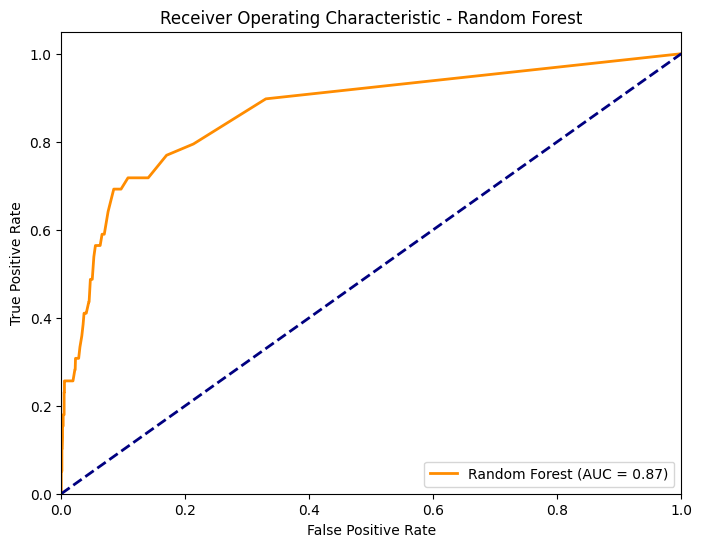

In [5]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=17)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute ROC curve and ROC area for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


Random Forest performs well, similar to Logistic Regression, with high accuracy. However, it shows better results for class 1, with improved precision, recall, and F1-score. The ROC AUC score is also quite good.

### Gradient Boosting Classifier with default parameters

Gradient Boosting Accuracy: 0.981
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1961
           1       0.53      0.26      0.34        39

    accuracy                           0.98      2000
   macro avg       0.76      0.63      0.67      2000
weighted avg       0.98      0.98      0.98      2000

ROC AUC Score: 0.9306084023065156


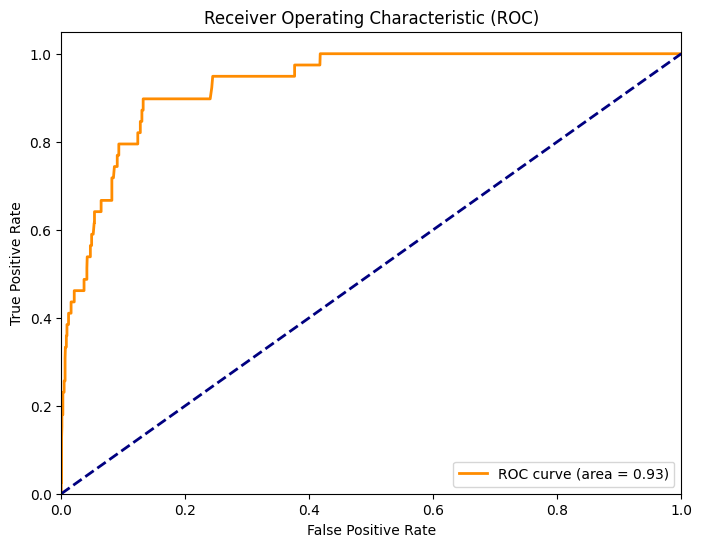

In [6]:
# Create a Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Accuracy:", accuracy)
print(classification_report(y_test, y_pred_gbm))

# Calculate ROC AUC score
y_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_gbm)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The Gradient Boosting Classifier outperforms the previous two models in terms of precision, recall, and F1-score for class 1. The ROC AUC score is the highest among the models, indicating better overall performance.

### Long Short-Term Memory (LSTM)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
# Define the sequence length (number of time steps)
sequence_length = 1

# Reshape your data for the LSTM model
X_train_reshaped = X_train.values.reshape(-1, sequence_length, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(-1, sequence_length, X_test.shape[1])

# Create the model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
250/250 [==============================] - 3s 4ms/step - loss: 0.2974 - accuracy: 0.9578 - val_loss: 0.1391 - val_accuracy: 0.9805
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1855 - accuracy: 0.9603 - val_loss: 0.1231 - val_accuracy: 0.9805
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1763 - accuracy: 0.9603 - val_loss: 0.1122 - val_accuracy: 0.9805
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1695 - accuracy: 0.9603 - val_loss: 0.1027 - val_accuracy: 0.9805
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1658 - accuracy: 0.9603 - val_loss: 0.1008 - val_accuracy: 0.9805
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1664 - accuracy: 0.9603 - val_loss: 0.0946 - val_accuracy: 0.9805
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1659 - accuracy: 0.9603 - val_loss: 0.0938 - val_accuracy: 0.9805
Epoch 

In [9]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(classification_report(y_test, y_pred_binary))

63/63 [==============================] - 0s 1ms/step
Test Accuracy: 98.05%
ROC AUC Score: 0.8387
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1961
           1       0.00      0.00      0.00        39

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.96      0.98      0.97      2000



C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The LSTM model achieved a test accuracy of 98.05%, which indicates that it correctly predicted the machine's normal state (class 0) in the majority of cases. However, the model's performance in detecting machine failures (class 1) is less impressive. The ROC AUC score of 0.8306 is worse than previous models.

### Apply Grid Search to find best hyperparameters for Gradient Boosting Classifier 

After comparing performance metrics of the four models, Gradient Boosting Classifier outperformed Logistic Regression, Random Forest and LSTM in terms of precision, recall, and F1-score, especially for class 1. Grid Search will be applied on Gradient Boosting Classifier to find the best hyperparameters.

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for GBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GBM model
gbm_model = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for GBM:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters for GBM: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


### Apply the best hyperparameters for Gradient Boosting Classifier 

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the best hyperparameters
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.01,
    'max_depth': 3,
    'subsample': 1.0,
    'random_state': 42
}

# Create the best GBM model with the best hyperparameters
best_gbm_model = GradientBoostingClassifier(**best_params)

# Define the number of splits for cross-validation (e.g., 5-fold cross-validation)
n_splits = 5

# Create a cross-validation splitter (StratifiedKFold is useful for imbalanced classes)
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(best_gbm_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Accuracy Scores: [0.9625   0.959375 0.9675   0.9625   0.9625  ]
Mean Accuracy: 0.962875
Standard Deviation of Accuracy: 0.002610076627227651


Gradient Boosting Classifier Accuracy: 0.9815
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1961
           1       0.57      0.21      0.30        39

    accuracy                           0.98      2000
   macro avg       0.78      0.60      0.65      2000
weighted avg       0.98      0.98      0.98      2000

ROC AUC Score: 0.9158919441938309


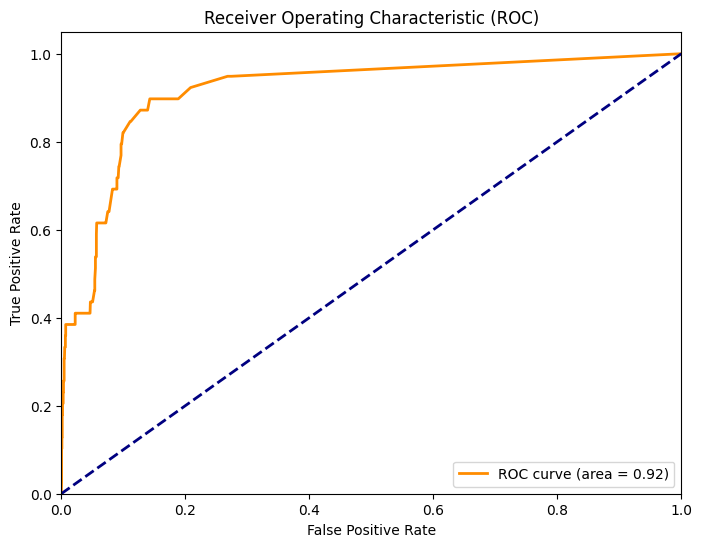

In [11]:
# Fit the model to your training data
best_gbm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gbm = best_gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Classifier Accuracy:", accuracy)
print(classification_report(y_test, y_pred_gbm))

# Calculate ROC AUC score
y_prob_gbm = best_gbm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_gbm)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Conclusion

In this project, I explored several machine learning and deep learning techniques to address the challenge of predictive maintenance in a time-series dataset. I started by applying Logistic Regression, Random Forest, Gradient Boosting Classifier, and LSTM models to predict machine failures.

A comprehensive set of evaluation metrics were employed, including accuracy, precision, recall, F1-score, and ROC AUC, to assess the performance of each model. Among these, the Gradient Boosting Classifier emerged as the standout performer.

To further enhance the Gradient Boosting Classifier's performance, I utilized Grid Search to fine-tune its hyperparameters, resulting in a model with a learning rate of 0.01, a maximum depth of 3, 200 estimators, and a subsample of 1.0. This tuned model achieved remarkable overall accuracy at 98.15% and demonstrated a robust ROC AUC score of 0.916. However, it's crucial to note that the model's precision and recall for positive predictions were somewhat lower, at 0.57 and 0.21, respectively. These values suggest that while the model performs admirably overall, there is room for improvement in accurately identifying machine failures while minimizing false alarms.

Additionally, we applied cross-validation to assess the model's generalization performance. The results indicated minimal overfitting, as the mean accuracy from cross-validation (0.963) closely mirrored the accuracy on the testing set. This underscores the model's reliability and suggests that it has the potential for real-world applications in predictive maintenance.